# <font color = lime>**Import data**

<font color = fuchsia> **Original code in Matlab**

<font color = fuchsia> **Translated code in Python**

<font color = orange>**NOTE**: **In Python, I can't simply read float32, I need to specify '>f' (big endian floating point)**

In [43]:
import numpy as np

######################################################################
# Function to read the off-diagonal elements in the covariance matrices
# NOTE: These are COMPLEX numbers

def readCross( fileName ):
    with open(fileName + '_lhhhv' , 'rb') as fin:
        hhhv0 = np.fromfile(fin , dtype = '>f').reshape((-1 , 2)).T
    hhhv = hhhv0[0 , :] + 1j * hhhv0[1 , :]
    
    with open(fileName + '_lhhvv' , 'rb') as fin:
        hhvv0 = np.fromfile(fin , dtype = '>f').reshape((-1 , 2)).T
    hhvv = hhvv0[0 , :] + 1j * hhvv0[1 , :]
    
    with open(fileName + '_lhvvv' , 'rb') as fin:
        hvvv0 = np.fromfile(fin , dtype = '>f').reshape((-1 , 2)).T
    hvvv = hvvv0[0 , :] + 1j * hvvv0[1 , :]
    
    return  hhhv, hhvv, hvvv

#######################################################################
# Function to read the main diagonal elements in the covariance matrices
# NOTE: These are REAL numbers

def readMain( fileName ):
    with open(fileName + '_lhhhh' , 'rb') as fin:
        hhhh = np.fromfile(fin , dtype = '>f')   
    
    with open(fileName + '_lhvhv' , 'rb') as fin:
        hvhv = np.fromfile(fin , dtype = '>f')
    
    with open(fileName + '_lvvvv' , 'rb') as fin:
        vvvv = np.fromfile(fin , dtype = '>f')
    
    return  hhhh, hvhv, vvvv

#########################################################################
# MAIN SCRIPT 

HH3, HV3, VV3 = readMain('fl064');
HH4, HV4, VV4 = readMain('fl065');
HHHV3, HHVV3, HVVV3 = readCross('fl064')
HHHV4, HHVV4, HVVV4 = readCross('fl065')

<font color = yellow> **Check that everything went well so far**

In [44]:
HH3.shape, HV3.shape, VV3.shape, HH3.dtype

((1048576,), (1048576,), (1048576,), dtype('>f4'))

In [45]:
HHHV3.shape, HHVV3.shape, HVVV3.shape, HHHV3.dtype

((1048576,), (1048576,), (1048576,), dtype('complex64'))

<font color = red>**There is inconsistence in the values read between Python and Matlab. The final results of this processing is not the same though the operations are... I can't find a solution to this problem**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# <font color = lime>**Display as Image**

<font color = fuchsia> **Original code in Matlab**

<font color = fuchsia> **Translated code in Python**

In [46]:
##################################################
# Functions to adapt data for visualization

def Norm(Ain):
    Amax = np.max(Ain)
    Amin = np.min(Ain)
    return (Ain - Amin) / (Amax - Amin)

##################################################

def scaling (HH, HV, VV):
    HH = Norm(10*np.log10(HH))
    HV = Norm(10*np.log10(HV))
    VV = Norm(10*np.log10(VV))
    
    return np.stack((HV, HH, VV), axis = 2)

###################################################
# Main Script

hh3 = np.reshape(HH3, (1024, 1024))
hv3 = np.reshape(HV3, (1024, 1024))
vv3 = np.reshape(VV3, (1024, 1024))

hh4 = np.reshape(HH4, (1024, 1024))
hv4 = np.reshape(HV4, (1024, 1024))
vv4 = np.reshape(VV4, (1024, 1024))

C3 = scaling(hh3, hv3, vv3)
C4 = scaling(hh4, hv4, vv4)

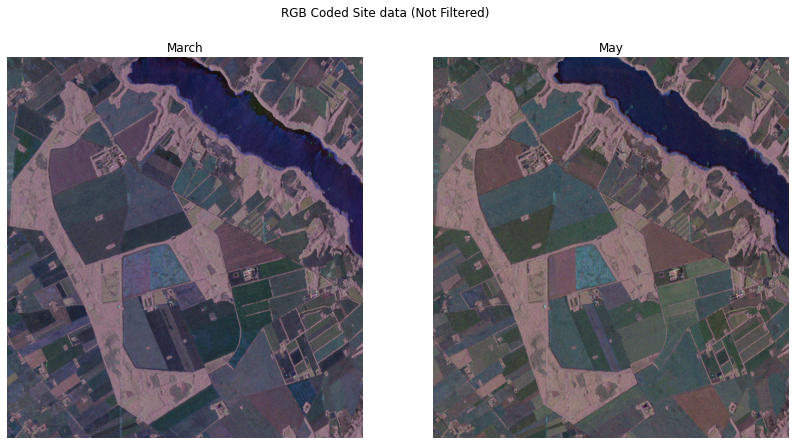

In [47]:
import matplotlib.pyplot as plt
#from matplotlib.pyplot import imshow

fig , ax = plt.subplots(1, 2, figsize=(14 , 7))

fig.suptitle('RGB Coded Site data (Not Filtered)')
ax[0].set_title('March')
ax[1].set_title('May')
ax[0].axis('off')
ax[1].axis('off')

ax[0].imshow(C3, aspect = 'auto')
ax[1].imshow(C4, aspect = 'auto')

Differences are already visible in these images.

![separator2](https://i.imgur.com/4gX5WFr.png)

# <font color = lime>**Equivalent Number of Looks Estimation**

<font color = fuchsia> **Original code in Matlab**

<font color = fuchsia> **Translated into Python**

<font color = red> **Cuts can be moved before this and simplify the calculation**

In [48]:
# Cut a ROI in the image and calculate the ENL
# (remember that Python excludes the last index when indexing)

def looks(M, x1, x2, y1, y2):
    A = M[ x1:x2-1 , y1:y2-1 ]
    rows , cols = A.shape
    mi = np.mean(A)
    sigma = np.var(A)
    
    return (mi**2) / sigma
                      
###########################################################
# Repeat the calculation of ENL for 3 different ROIs and on
# 3 datasets (the co-registered data)

def EqNLooks(HH, HV, VV):
    ENL = np.empty(9).T
    
    # Area #1
    x1 = np.int64(360)
    x2 = np.int64(410)
    y1 = np.int64(205)
    y2 = np.int64(279)
    
    ENL[0] = looks(HH, x1, x2, y1, y2);
    ENL[1] = looks(HV, x1, x2, y1, y2);
    ENL[2] = looks(VV, x1, x2, y1, y2);
    
    # Area #2
    x1 = np.int64(715)
    x2 = np.int64(764)
    y1 = np.int64(360)
    y2 = np.int64(399)
    
    ENL[3] = looks(HH, x1, x2, y1, y2);
    ENL[4] = looks(HV, x1, x2, y1, y2);
    ENL[5] = looks(VV, x1, x2, y1, y2);
    
    # Area #3
    x1 = np.int64(115)
    x2 = np.int64(179)
    y1 = np.int64(610)
    y2 = np.int64(669)
    
    ENL[6] = looks(HH, x1, x2, y1, y2);
    ENL[7] = looks(HV, x1, x2, y1, y2);
    ENL[8] = looks(VV, x1, x2, y1, y2);
    
    return ENL

############################################################
# Main Script

############################################
# Equivalent Number of Looks Estimation   
############################################

# Assumed that the data for the three channels hhhh, hvhv, vvvv are already
# available (execute after "images")

# Unfiltered data
HH = np.reshape(HH3, (1024, 1024))
HV = np.reshape(HV3, (1024, 1024))
VV = np.reshape(VV3, (1024, 1024))
enlsArr = EqNLooks(HH, HV, VV)
ENL = np.round(np.mean(enlsArr))

<font color = yellow> **Check**

In [49]:
ENL

9.0

<font color = yellow>**NOTE**: **By repeating the same processing after applying speckle noise reduction, the ENL should increase to about 23**

---

<font color = fuchsia> **Choice of the ROI selection**

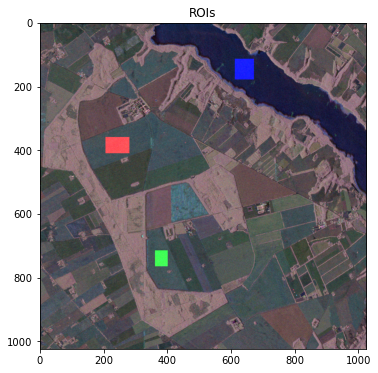

In [50]:
M = np.copy(C4)
M[360:411 , 205:280 , 0] = 1 # Red
M[715:765 , 360:400 , 1] = 1 # Green
M[115:180 , 610:670 , 2] = 1 # Blue

plt.figure('ROIs', figsize=(6,6))
plt.title('ROIs')
plt.imshow(M)
plt.savefig('ROIs')

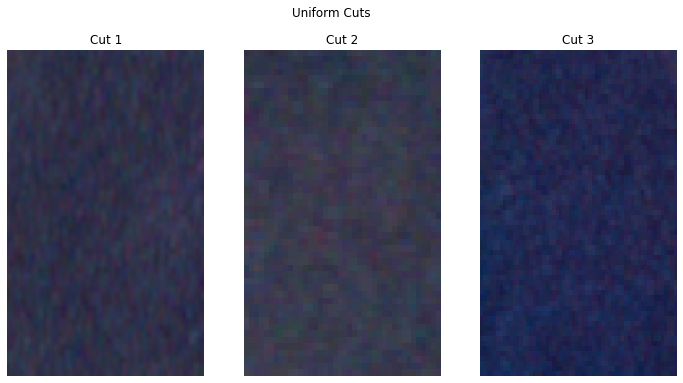

In [16]:
Cut1 = C3[360:411 , 205:280 , :]
Cut2 = C3[715:765 , 360:400 , :]
Cut3 = C3[115:180 , 610:670 , :]

fig , ax = plt.subplots(1,3, figsize=(12,6))

fig.suptitle('Uniform Cuts')
ax[0].set_title('Cut 1')
ax[1].set_title('Cut 2')
ax[2].set_title('Cut 3')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

ax[0].imshow(Cut1, aspect = 'auto')
ax[1].imshow(Cut2, aspect = 'auto')
ax[2].imshow(Cut3, aspect = 'auto')

---
<font color = fuchsia> **Optionally: another way to show the ROIs (Using OpenCV)**

In [51]:
import cv2 as cv

R = C3[:,:,0]
G = C3[:,:,1]
B = C3[:,:,2]
img = np.stack([B,G,R], axis = -1)

img = cv.rectangle(img, pt1 = (205, 360), pt2 = (280,411), color=(0,0,255), thickness=2) # red
img = cv.rectangle(img, pt1 = (360,715), pt2 = (400, 765), color=(0,255,0), thickness=2) # green
img = cv.rectangle(img, pt1 = (610, 115), pt2 = (670, 180), color=(255,0,0), thickness=2) # blue

#cv.imwrite('ROIs.png', 255*img)

cv.namedWindow("March - ROI", cv.WINDOW_NORMAL)
cv.imshow('March - ROI', img)
cv.waitKey(0)

-1

![separator2](https://i.imgur.com/4gX5WFr.png)

# <font color = lime>**Building the Covariance Matrices**

<font color = fuchsia> **Original code in Matlab**

<font color = fuchsia> **Translated code in Python**

In [52]:
##########################################################################
#                             CM

# Builds a  3x3xl matrix with all the covariance matrices, for every pixel
# (CovMat)

# NB: l = number of pixels
# NB: It must work for matrices of general dimensions because after 
# despeckling the dimensions of the matrices will change

# On the workspace:
#     Cmx (x = specific data set)
##########################################################################

def CovMat( HH, HV, VV, HHHV, HHVV, HVVV ):
    l = len(HH)
    CM = np.empty( (3 , 3 , l), dtype = np.complex64)
    
    # HH, HV, and VV are real and need to be converted to complex otherwise numpy will convert everything to real
    # and drop the imaginary part of complex numbers
    #CM[ 0 , 0 , : ] = np.complex64(HH)
    CM[ 0 , 0 , : ] = HH
    CM[ 0 , 1 , : ] = HHHV
    CM[ 0 , 2 , : ] = HHVV
    
    CM[ 1 , 0 , : ] = np.conj(HHHV)
    #CM[ 1 , 1 , : ] = np.complex64(HV)
    CM[ 1 , 1 , : ] = HV
    CM[ 1 , 2 , : ] = HVVV
    
    CM[ 2 , 0 , : ] = np.conj(HHVV)
    CM[ 2 , 1 , : ] = np.conj(HVVV)
    #CM[ 2 , 2 , : ] = np.complex64(VV)
    CM[ 2 , 2 , : ] = VV
    
    return CM

# NOT FILTERED
Cm3 = CovMat(HH3, HV3, VV3, HHHV3, HHVV3, HVVV3)
Cm4 = CovMat(HH4, HV4, VV4, HHHV4, HHVV4, HVVV4)

In [53]:
Cm3.shape , Cm3.dtype

((3, 3, 1048576), dtype('complex64'))

In [54]:
Z = Cm3[0:3, 0:3, 0]


detZ = Z[0,0]*Z[1,1]*Z[2,2] + Z[0,1]*Z[1,2]*Z[2,0] + Z[1,0]*Z[2,1]*Z[0,2] - Z[2,0]*Z[1,1]*Z[0,2] - Z[0,1]*Z[1,0]*Z[2,2] - Z[0,0]*Z[2,1]*Z[1,2]

np.real(detZ) , np.real(np.linalg.det(Z))

(6.7918364e-08, 6.791837e-08)

![separator2](https://i.imgur.com/4gX5WFr.png)

# <font color = lime>**Test Statistics**

First, an area with no changes will need to be selected to extract it's distribution.

This information is used to verify the null Hypothesis, chosen a 1% or 5% significance level. 

<font color = fuchsia> **Original code in Matlab**

<font color = fuchsia> **Translated code in Python**

In [55]:
# Calculates the determinants of the covariance matrices for each pixel

# NOTE: The elements above the main diagonal in the covariance matrices
#       are the complex conjugates of the ones below, therefore the
#       determinants are real numbers. Because of the limited precision
#       of the floating point numbers, the calculation may have a non-zero
#       imaginary part which theoretically shouldn't be there, so it can be
#       ignored.

def CMIm(Cm , n):
    L = np.ma.size(Cm, axis = 2)
    V = np.empty(L).T
    for k in range(L):
        V[k] = np.real(np.linalg.det(Cm[0:3 , 0:3 , k]))
    X = np.reshape(V, (n, n)).T
    return X

#######################################################################




#######################################################################
#                         Main Script
#######################################################################

#####################################
#               lnQ       
#####################################

# Not Filtered

X = CMIm(Cm3 , 1024)
Y = CMIm(Cm4 , 1024)

XpY = CMIm(Cm3 + Cm4 , 1024)

In [56]:
X.shape , Y.shape , XpY.shape

((1024, 1024), (1024, 1024), (1024, 1024))

In [57]:
lnQ = ENL*(6*np.log(2) + np.log(Y) + np.log(X) - 2*np.log(XpY))
    
     
########################################
#      No changes distribution   
########################################
rho = 1 - (17/18)*(1/9 + 1/9 - 1/6) 
T = - 2*rho*lnQ 

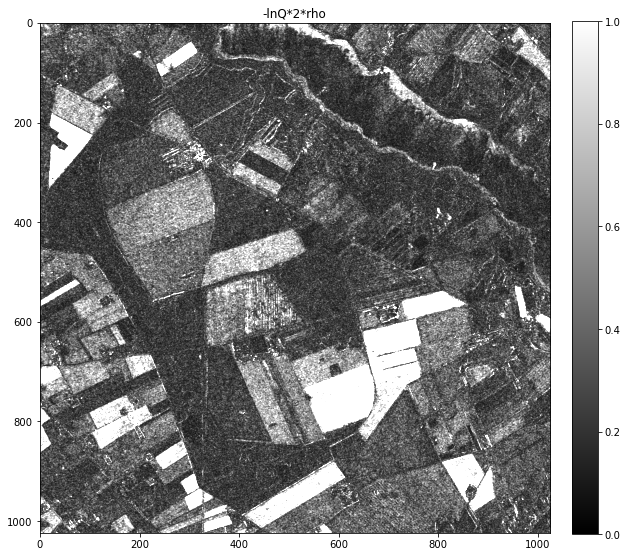

In [58]:
plt.figure('-lnQ*2*rho', figsize=(10,10))
plt.title('-lnQ*2*rho')

plt.imshow(T.T / 32, cmap='gray', vmin = 0, vmax = 1)
plt.colorbar(fraction=0.046, pad=0.04)
   
#plt.savefig('-2plnQ')
#plt.savefig('-lnQ')

<font color = yellow>**Select a threshold.**

<font color = red> **DOESN'T WORK... Or there are just problems with the values prior to this point**

In [60]:
R = C3[:,:,0]
G = C3[:,:,1]
B = C3[:,:,2]
img = np.stack([B,G,R], axis = -1)

img = cv.rectangle(img, pt1 = (30, 351), pt2 = (111,442), color=(0,0,255), thickness=2) # red
#img = cv.rectangle(img, pt1 = (360,715), pt2 = (400, 765), color=(0,255,0), thickness=2) # green
#img = cv.rectangle(img, pt1 = (610, 115), pt2 = (670, 180), color=(255,0,0), thickness=2) # blue

cv.imwrite('NoChangeRegion.png', 255*img)

cv.namedWindow("March - No Change Region", cv.WINDOW_NORMAL)
cv.imshow('March - No Change Region', img)
cv.waitKey(0)

-1

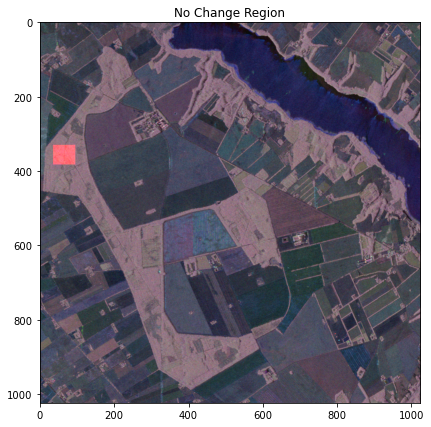

In [61]:
cut = np.copy(C3)
cut[330:383 , 35:95 , 0] = 1 # Red
#cut[715:765 , 360:400 , 1] = 1 # Green
#cut[115:180 , 610:670 , 2] = 1 # Blue

plt.figure('No Change Region', figsize=(7,7))
plt.title('No Change Region')
plt.imshow(cut)
#plt.savefig('No Change Region')

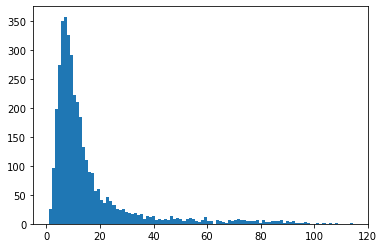

In [28]:
def NCD(T):
    NC = T[320:383 , 35:95]
    #plt.figure('',figsize=(6,6))
    #plt.title('mmm')
    plt.hist(np.ndarray.flatten(NC), bins=100)
    return NC
    
##########################################

NC = NCD(T)

---

In [62]:
NC.shape

(63, 60)

In [63]:
def threshold(A):
    x , y = A.shape
    cntPix = 0
    totPix = x * y
    step = 0.001
    
    th = np.max(A)
    P = 0
    
    while (P - 1 <= 0):
        cntPix = np.count_nonzero(A > th)
        P = cntPix / totPix * 100
        th = th - step
                            
    th = th + step
    P = np.count_nonzero(A > th) / totPix * 100 
    print(P)
    return th

# Main Script

th = threshold(NC)
TS = np.copy(T)
q = th
TS[T < q] = 0
TS[T >= q] = 1

1.0052910052910053


In [64]:
TS.shape , th 

((1024, 1024), 86.9527301003591)

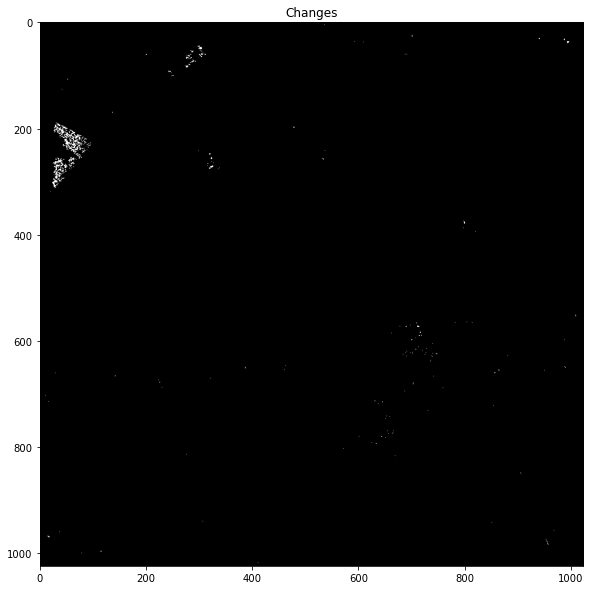

In [65]:
plt.figure('Changes', figsize=(10,10))
plt.title('Changes')

plt.imshow(TS.T, cmap='gray', vmin = 0, vmax = 1)